In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def order_matrix(A):
    idx = np.argsort(-(np.square(np.abs(A)).sum(1)))
    return A[idx]    
import pickle
with open(r"sim_results/variable_selection.pickle", "rb") as input_file:
     tlist, nxlist = pickle.load(input_file)

In [2]:
runs = 20
M1_list = np.stack([order_matrix(tlist[i].A_list[0].detach().cpu().numpy()) for i in range(runs)])
M2_list = np.stack([order_matrix(tlist[i].A_list[1].detach().cpu().numpy()) for i in range(runs)])
M3_list = np.stack([order_matrix(tlist[i].A_list[2].detach().cpu().numpy()) for i in range(runs)])
idx_array = np.arange(18).reshape((3, 6))
combine_array = np.stack([M1_list, M2_list, M3_list])
first_row = combine_array[:, :, 0]
reshaped_row = first_row[:, :, idx_array]
norm_array = np.sqrt(np.square(reshaped_row).sum(-1))
norm_min = norm_array.min(-1)
diff_array = norm_array - norm_min[:, :, None]

matrix_order = np.zeros((runs, 3))
for j in range(runs):
    cur_array = diff_array[:, j].copy()
    sort_idx = np.argsort(cur_array, axis = -1)

    
    for i in range(3):
        cur_idx = cur_array.max(1).argmax()
        resulting_idx = sort_idx[cur_idx][-1]
        matrix_order[j, resulting_idx] = cur_idx
        
        cur_array[cur_idx, resulting_idx] = -1
        sort_idx = np.argsort(cur_array, axis = -1)

reformed_array = np.zeros((3, runs, 4, 20))
for j in range(runs):
    reformed_array[matrix_order[j].astype(int), j] = combine_array[:, j]
mean_array = np.abs(reformed_array).mean(1)
lower_q = np.quantile(np.abs(reformed_array), .1, axis = 1)
woof = np.sqrt(np.square(reformed_array).sum(2))


# Generate Figure 11 in Appendix C

 <>:72: SyntaxWarning:invalid escape sequence '\h'
 <>:79: SyntaxWarning:invalid escape sequence '\h'
 <>:86: SyntaxWarning:invalid escape sequence '\h'
 <>:72: SyntaxWarning:invalid escape sequence '\h'
 <>:79: SyntaxWarning:invalid escape sequence '\h'
 <>:86: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3172947959.py:72: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3172947959.py:79: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3172947959.py:86: SyntaxWarning:invalid escape sequence '\h'


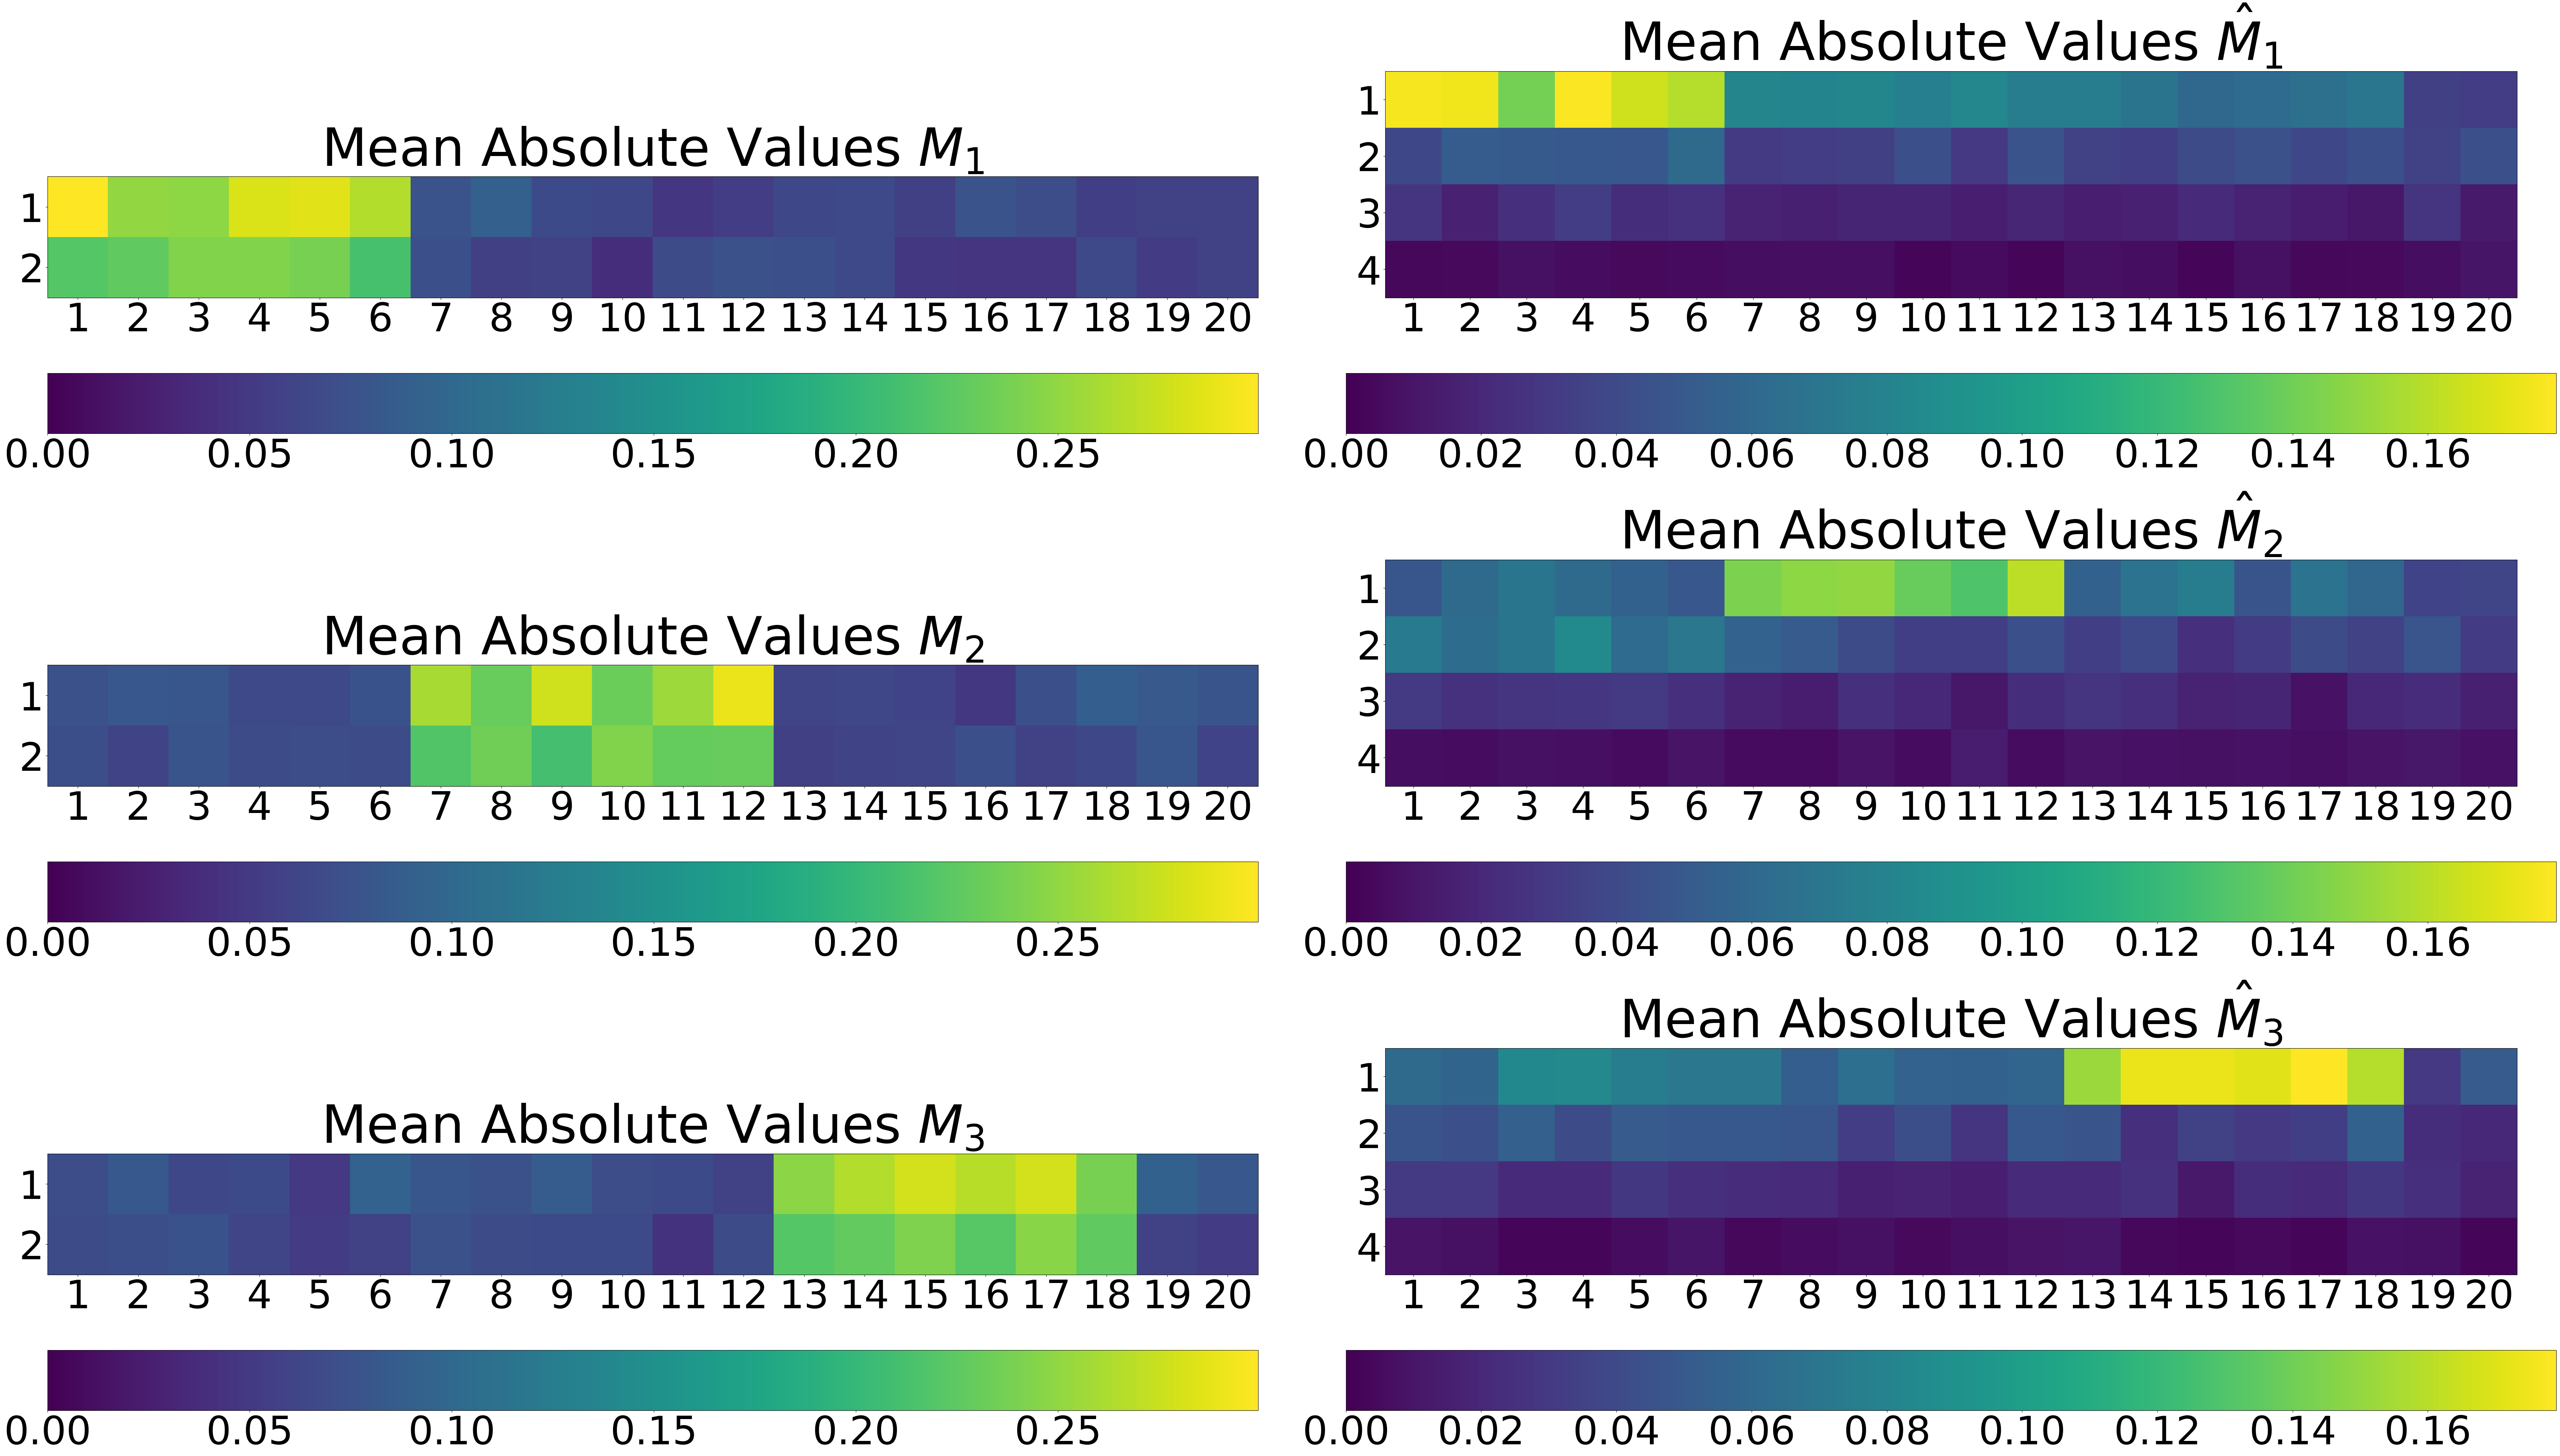

In [3]:

import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 75}
matplotlib.rc('font', **font)


fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (70, 40))

#truth 

xcol = np.arange(20) + 1
ycol = np.arange(2) + 1

M1_list = np.stack([order_matrix(nxlist[i][0].detach().cpu().numpy()) for i in range(20)])
M2_list = np.stack([order_matrix(nxlist[i][1].detach().cpu().numpy()) for i in range(20)])
M3_list = np.stack([order_matrix(nxlist[i][2].detach().cpu().numpy()) for i in range(20)])

M1 = np.abs(M1_list).mean(0)
M2 = np.abs(M2_list).mean(0)
M3 = np.abs(M3_list).mean(0)


vmax = np.max(np.abs(np.concatenate([M1, M2, M3], axis = 0)))
vmin = np.min(np.concatenate([M1, M2, M3], axis = 0))
vmin = 0


ax1 = axs[0, 0].imshow(np.abs(M1), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[0, 0].set_title("Mean Absolute Values $M_1$", fontdict = {'fontsize': 100})
axs[0, 0].set_xticks(np.arange(20))
axs[0, 0].set_yticks(np.arange(2))
axs[0, 0].set_xticklabels(xcol)
axs[0, 0].set_yticklabels(ycol)


ax2 = axs[1, 0].imshow(np.abs(M2), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[1, 0].set_title("M0", fontsize = 200)
axs[1, 0].set_title("Mean Absolute Values $M_2$" , fontdict = {'fontsize': 100})
axs[1, 0].set_xticks(np.arange(20))
axs[1, 0].set_yticks(np.arange(2))
axs[1, 0].set_xticklabels(xcol)
axs[1, 0].set_yticklabels(ycol)


ax3 = axs[2, 0].imshow(np.abs(M3), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[2, 0].set_title("M1")
axs[2, 0].set_title("Mean Absolute Values $M_3$",fontdict = {'fontsize': 100})
axs[2, 0].set_xticks(np.arange(20))
axs[2, 0].set_yticks(np.arange(2))
axs[2, 0].set_xticklabels(xcol)
axs[2, 0].set_yticklabels(ycol)

fig.colorbar(ax1, fraction=0.2, pad=0.2, orientation = 'horizontal')
fig.colorbar(ax2, fraction=0.2, pad=0.2, orientation = 'horizontal')
fig.colorbar(ax3, fraction=0.2, pad=0.2, orientation = 'horizontal')

#other truth

M1 = mean_array[0]
M2 = mean_array[1]
M3 = mean_array[2]
xcol = np.arange(20) + 1
ycol = np.arange(4) + 1
#M1, M3 = M3, M1


vmax = np.max(np.abs(np.concatenate([M1, M2, M3], axis = 0)))
vmin = np.min(np.concatenate([M1, M2, M3], axis = 0))
vmin = 0
ax1 = axs[0, 1].imshow(np.abs(M1), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[0,1].set_title("Mean Absolute Values $\hat{M}_1$", fontdict = {'fontsize': 100})
axs[0, 1].set_xticks(np.arange(20))
axs[0, 1].set_yticks(np.arange(4))
axs[0, 1].set_xticklabels(xcol)
axs[0, 1].set_yticklabels(ycol)

ax2 = axs[1, 1].imshow(np.abs(M2), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[1, 1].set_title("Mean Absolute Values $\hat{M}_2$", fontdict = {'fontsize': 100})
axs[1,1].set_xticks(np.arange(20))
axs[1,1].set_yticks(np.arange(4))
axs[1,1].set_xticklabels(xcol)
axs[1,1].set_yticklabels(ycol)

ax3 = axs[2, 1].imshow(np.abs(M3), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[2, 1].set_title("Mean Absolute Values $\hat{M}_3$", fontdict = {'fontsize': 100})
axs[2, 1].set_xticks(np.arange(20))
axs[2,1].set_yticks(np.arange(4))
axs[2, 1].set_xticklabels(xcol)
axs[2,1 ].set_yticklabels(ycol)


fig.colorbar(ax1, fraction=0.2, pad=0.2, orientation = 'horizontal')
fig.colorbar(ax2, fraction=0.2, pad=0.2, orientation = 'horizontal')
fig.colorbar(ax3, fraction=0.2, pad=0.2, orientation = 'horizontal')

fig.tight_layout()
plt.savefig('paper_plots/review_mean_matrix.png', dpi = 200, bbox_inches='tight')


 <>:15: SyntaxWarning:invalid escape sequence '\h'
 <>:22: SyntaxWarning:invalid escape sequence '\h'
 <>:29: SyntaxWarning:invalid escape sequence '\h'
 <>:15: SyntaxWarning:invalid escape sequence '\h'
 <>:22: SyntaxWarning:invalid escape sequence '\h'
 <>:29: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3274850033.py:15: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3274850033.py:22: SyntaxWarning:invalid escape sequence '\h'
 /tmp/ipykernel_74929/3274850033.py:29: SyntaxWarning:invalid escape sequence '\h'


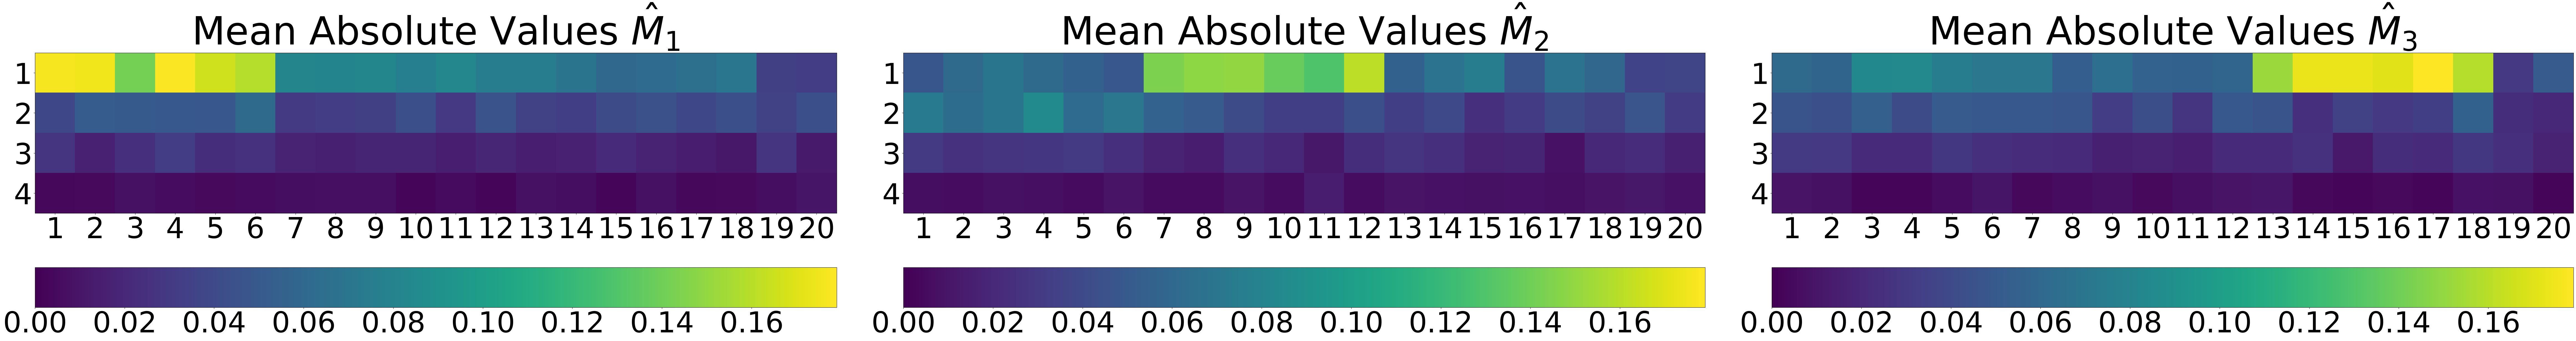

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (95, 80))

M1 = mean_array[0]
M2 = mean_array[1]
M3 = mean_array[2]
xcol = np.arange(20) + 1
ycol = np.arange(4) + 1
#M1, M3 = M3, M1


vmax = np.max(np.abs(np.concatenate([M1, M2, M3], axis = 0)))
vmin = np.min(np.concatenate([M1, M2, M3], axis = 0))
vmin = 0
ax1 = axs[0].imshow(np.abs(M1), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[0].set_title("Mean Absolute Values $\hat{M}_1$", fontdict = {'fontsize': 100})
axs[0].set_xticks(np.arange(20))
axs[0].set_yticks(np.arange(4))
axs[0].set_xticklabels(xcol)
axs[0].set_yticklabels(ycol)

ax2 = axs[1].imshow(np.abs(M2), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[1].set_title("Mean Absolute Values $\hat{M}_2$", fontdict = {'fontsize': 100})
axs[1].set_xticks(np.arange(20))
axs[1].set_yticks(np.arange(4))
axs[1].set_xticklabels(xcol)
axs[1].set_yticklabels(ycol)

ax3 = axs[2].imshow(np.abs(M3), vmin = vmin, vmax = vmax, cmap = 'viridis')
axs[2].set_title("Mean Absolute Values $\hat{M}_3$", fontdict = {'fontsize': 100})
axs[2].set_xticks(np.arange(20))
axs[2].set_yticks(np.arange(4))
axs[2].set_xticklabels(xcol)
axs[2].set_yticklabels(ycol)


fig.colorbar(ax1, fraction=0.2, pad=0.025, orientation = 'horizontal')
fig.colorbar(ax2, fraction=0.2, pad=0.025, orientation = 'horizontal')
fig.colorbar(ax3, fraction=0.2, pad=0.025, orientation = 'horizontal')

fig.tight_layout()
plt.savefig('paper_plots/review_mean_matrix.png', dpi = 200, bbox_inches='tight')


# Generate Figure 7 in Section 5

In [9]:
runs = 20
M1_list = np.stack([order_matrix(tlist[i].A_list[0].detach().cpu().numpy()) for i in range(runs)])
M2_list = np.stack([order_matrix(tlist[i].A_list[1].detach().cpu().numpy()) for i in range(runs)])
M3_list = np.stack([order_matrix(tlist[i].A_list[2].detach().cpu().numpy()) for i in range(runs)])
idx_array = np.arange(18).reshape((3, 6))
combine_array = np.stack([M1_list, M2_list, M3_list])
first_row = combine_array[:, :, 0]
reshaped_row = first_row[:, :, idx_array]
norm_array = np.sqrt(np.square(reshaped_row).sum(-1))
norm_min = norm_array.min(-1)
diff_array = norm_array - norm_min[:, :, None]

matrix_order = np.zeros((runs, 3))
for j in range(runs):
    cur_array = diff_array[:, j].copy()
    sort_idx = np.argsort(cur_array, axis = -1)

    
    for i in range(3):
        cur_idx = cur_array.max(1).argmax()
        resulting_idx = sort_idx[cur_idx][-1]
        matrix_order[j, resulting_idx] = cur_idx
        
        cur_array[cur_idx, resulting_idx] = -1
        sort_idx = np.argsort(cur_array, axis = -1)

reformed_array = np.zeros((3, runs, 4, 20))
for j in range(runs):
    reformed_array[matrix_order[j].astype(int), j] = combine_array[:, j]
mean_array = np.abs(reformed_array).mean(1)
lower_q = np.quantile(np.abs(reformed_array), .1, axis = 1)
woof = np.sqrt(np.square(reformed_array).sum(2))


In [10]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)


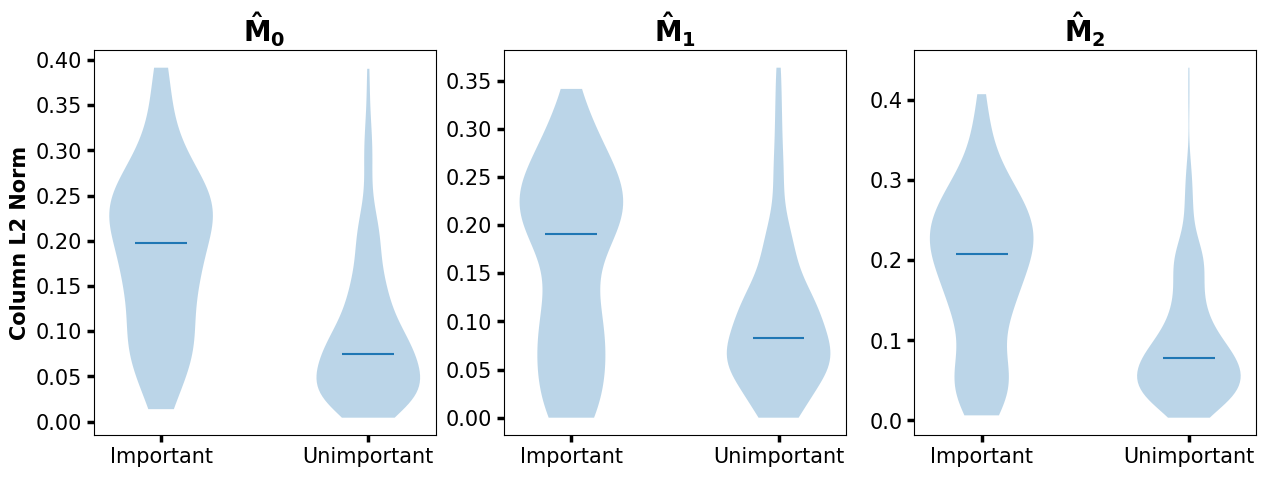

In [26]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
full_idx = np.arange(0, 20)

for i in range(3):
    cur_idx = np.delete(full_idx, idx_array[i])
    cur_dat = [woof[i, :, idx_array[i]].flatten(), woof[i, :, cur_idx].flatten()]
    axs[i].violinplot(cur_dat, showmedians = True, showextrema = False)
    #axs[i].violinplot(cur_dat, showmedians = True, showextrema = False)
    axs[i].set_xticks([y + 1 for y in range(2)],
              labels=['Important', 'Unimportant'])
    axs[i].set_title(r"$\bf \hat M_{}$".format(i), fontsize = 20, fontweight = "bold")
    axs[i].tick_params(axis='y', which='both', labelsize=15, length = 5, width = 2.5)
    axs[i].tick_params(axis='x', which='both', labelsize=15, length = 5, width = 2.5)

#fig.suptitle("Column Norms of $\hat{M}_i$")
axs[0].set_ylabel("Column L2 Norm", fontsize = 15, fontweight = "bold")
#axs[1].set_xlabel("Column Type", fontsize = 25, fontweight = "bold")
plt.savefig("paper_plots/review_norms.png", dpi = 150, bbox_inches = "tight")